In [2]:
using Gadfly

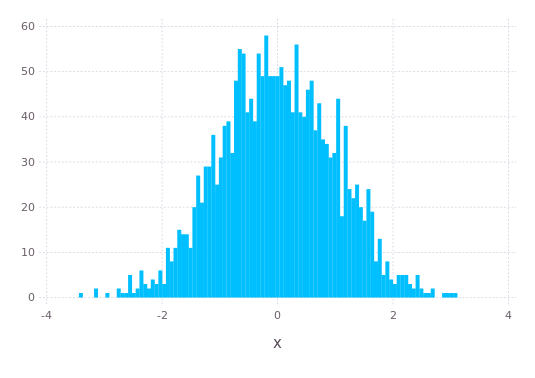

In [3]:
p = plot(x=randn(2000), Geom.histogram(bincount=100))

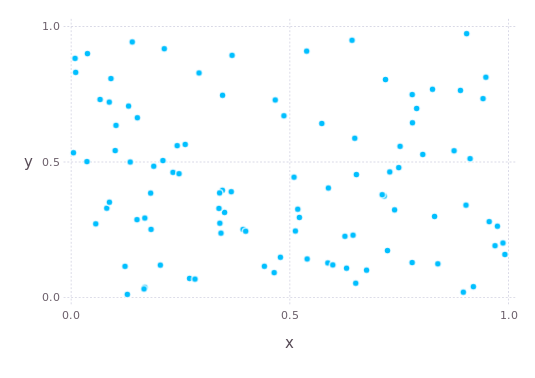

In [4]:
plot(x=rand(100), y=rand(100))

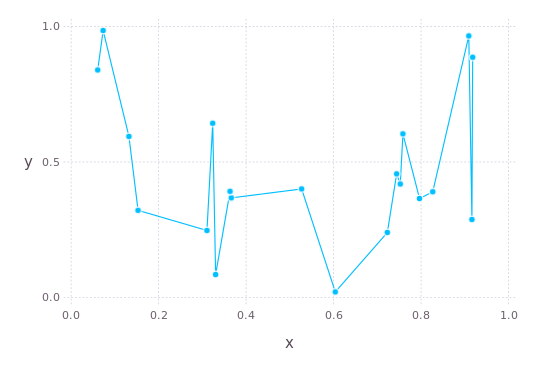

In [5]:
plot(x=rand(20), y=rand(20), Geom.point, Geom.line)

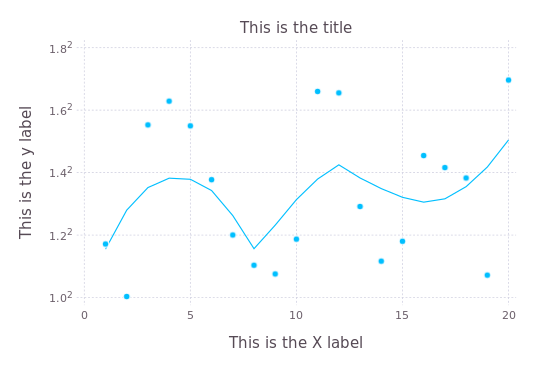

In [6]:
plot(x=1:20, y=3.^rand(20),
     Scale.y_sqrt, Geom.point, Geom.smooth,
     Guide.xlabel("This is the X label"),
     Guide.ylabel("This is the y label"),
     Guide.title("This is the title"))

In [7]:
# display help
#?SVGJS
#?Gadfly.plot

In [8]:
using RDatasets

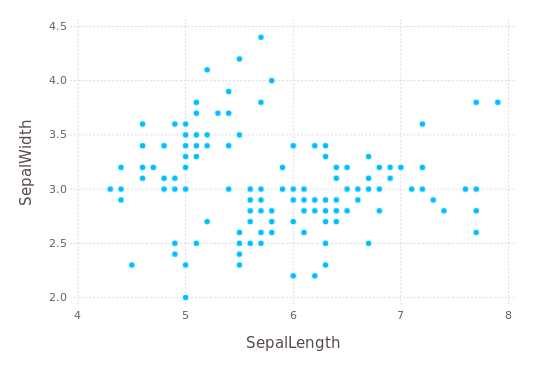

In [9]:
plot(dataset("datasets", "iris"),
    x="SepalLength", y="SepalWidth", Geom.point)

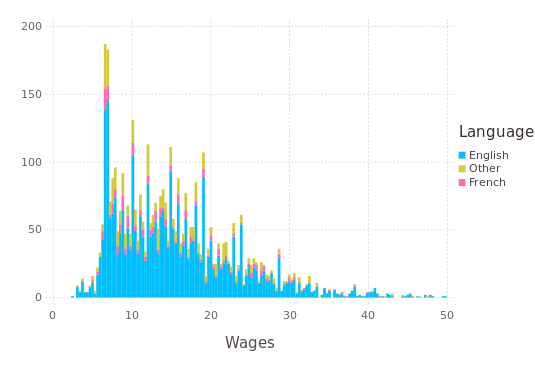

In [10]:
plot(dataset("car", "SLID"),
    x="Wages", color="Language", Geom.histogram)

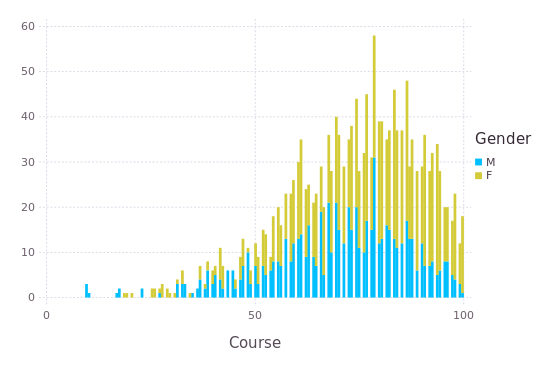

In [11]:
plot(dataset("mlmRev","Gcsemv"),
    x="Course", color="Gender", Geom.histogram)

In [12]:
dd  =  plot(x =  rand(10),  y = rand(10));
draw(SVG("random-pts.svg",  15cm, 12cm) , dd);

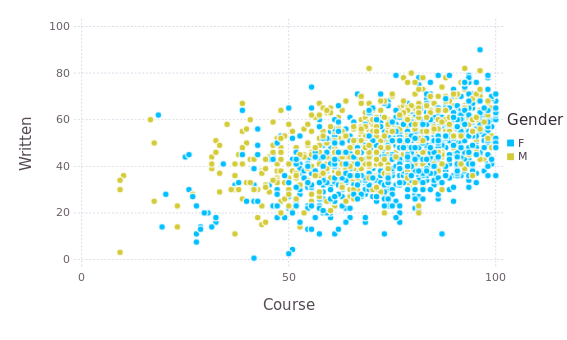

In [13]:
set_default_plot_size(15cm, 9cm);
mlmf = dataset("mlmRev","Gcsemv")
#df = mlmf[complete_cases(mlmf), :]
df = mlmf[completecases(mlmf), :]
names(df)
plot(df, x="Course", y="Written", color="Gender")

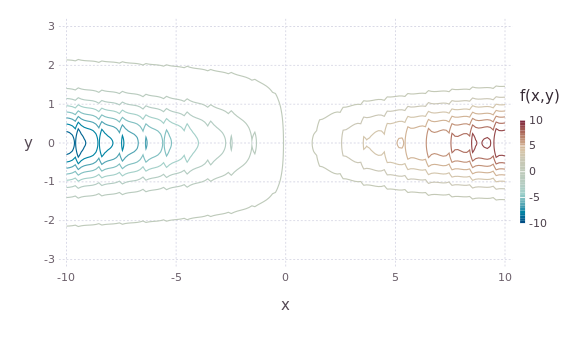

In [19]:
# Not work see https://groups.google.com/forum/#!topic/julia-users/63jz1IOjCOQ
# plot((x,y) -> x*exp(-(x-int(x))^3-y^2), -10., 10, -3., 3)
plot((x,y) -> x*exp(-(x-round(Int,x))^3-y^2), -10., 10, -3., 3)

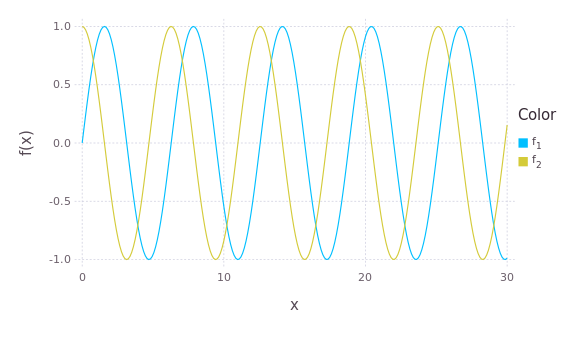

In [20]:
plot([sin, cos], 0, 30)

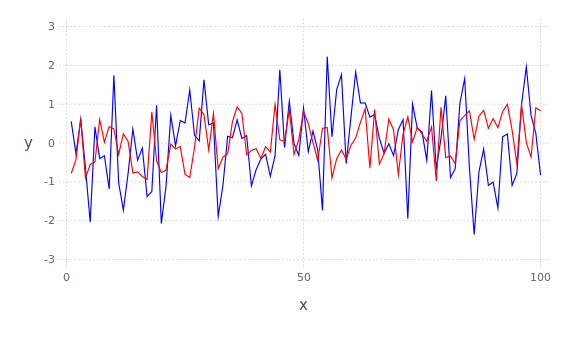

In [22]:
x = [1:100;];
y1 = 1 - 2*rand(100);
y2 = randn(100);
plot(
 # not work
 #layer(x=x,y=y1,Geom.line,Theme(default_color=color("red"))),
 #layer(x=x,y=y2,Geom.line,Theme(default_color=color("blue")))
 layer(x=x,y=y1,Geom.line,Theme(default_color=colorant"red")),
 layer(x=x,y=y2,Geom.line,Theme(default_color=colorant"blue"))
)

In [23]:
p1 = plot(x=rand(1,1,10), y=rand(1,1,10))
p2 = plot(x=rand(10,1,20), y=rand(10,1,20))
draw(PNG("p1and2.png", 6inch, 6inch), vstack(p1,p2))
p3 = plot(x=rand(20,1,30), y=rand(20,1,30))
p4 = plot(x=rand(30,1,40), y=rand(30,1,40))
draw(PNG("p1to4.png", 6inch, 9inch), vstack(hstack(p1,p2),hstack(p3,p4)))

In [25]:
shapes = Gadfly.compose(Gadfly.context(), fill("cornflowerblue"),
          (Gadfly.context( 0.1, 0.1, 0.15, 0.1 ),  Gadfly.circle()),
          (Gadfly.context( 0.35, 0.06, 0.2, 0.18 ),
          Gadfly.rectangle(), Gadfly.fill("red")),
          (Gadfly.context( 0.6, 0.05, 0.2, 0.2), Gadfly.fill("magenta3"),
          Gadfly.polygon([(1, 1), (0.3, 1), (0.5, 0)]) ));

In [26]:
img = SVG("shapes.svg", 10cm, 8.66cm)

In [27]:
draw(img,shapes)

false

In [28]:
using Compose

In [29]:
function sierpinski(n)
  if n == 0
    compose(context(), polygon([(1,1), (0,1), (1/2, 0)]));
  else 
    t = sierpinski(n - 1);
    compose( context(), (context( 1/4, 0, 1/2, 1/2), t),
                        (context( 0, 1/2, 1/2, 1/2), t),
                        (context( 1/2, 1/2, 1/2, 1/2), t));
  end
end

sierpinski (generic function with 1 method)

In [30]:
cx1 = compose(sierpinski(1), linewidth(0.2mm),
  fill(nothing), stroke("black"));
img = SVG("sierp1.svg", 10cm, 8.66cm); draw(img,cx1)

false

In [31]:
cx3 = compose(sierpinski(3), linewidth(0.2mm),
  fill(nothing), stroke("black"));
img = SVG("sierp3.svg", 10cm, 8.66cm); draw(img,cx3)

false

In [32]:
cx5 = compose(sierpinski(5), linewidth(0.2mm),
  fill(nothing), stroke("black"));
img = SVG("sierp5.svg", 10cm, 8.66cm); draw(img,cx5)

false

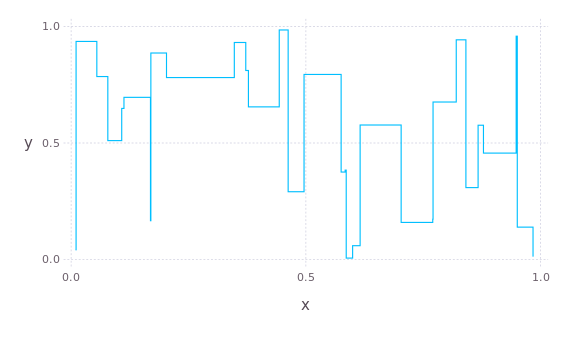

In [33]:
plot(x=rand(30), y=rand(30), Stat.step, Geom.line)

In [34]:
using Distributions

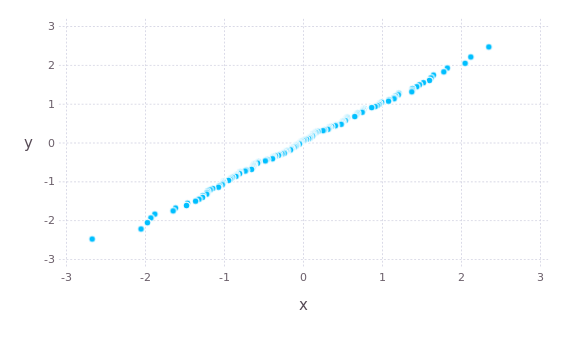

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] quantile(::Distributions.Normal{Float64}, ::Array{Float64,1}) at ./deprecated.jl:57
 [3] qqbuild(::Array{Float64,1}, ::Distributions.Normal{Float64}) at /root/.julia/v0.6/Distributions/src/qq.jl:18
 [4] apply_statistic(::Gadfly.Stat.QQStatistic, ::Dict{Symbol,Gadfly.ScaleElement}, ::Gadfly.Coord.Cartesian, ::Gadfly.Aesthetics) at /root/.julia/v0.6/Gadfly/src/statistics.jl:1469
 [5] apply_statistics(::Array{Gadfly.StatisticElement,1}, ::Dict{Symbol,Gadfly.ScaleElement}, ::Gadfly.Coord.Cartesian, ::Gadfly.Aesthetics) at /root/.julia/v0.6/Gadfly/src/statistics.jl:40
 [6] render_prepare(::Gadfly.Plot) at /root/.julia/v0.6/Gadfly/src/Gadfly.jl:689
 [7] render(::Gadfly.Plot) at /root/.julia/v0.6/Gadfly/src/Gadfly.jl:748
 [8] show at /root/.julia/v0.6/Gadfly/src/Gadfly.jl:952 [inlined]
 [9] limitstringmime(::MIME{Symbol("image/svg+xml")}, ::Gadfly.Plot) at /root/.julia/v0.6/IJulia/src/inline.jl:24
 [10] display_dict(::Gad

In [35]:
plot(x=rand(Normal(), 150), y=rand(Normal(), 150), Stat.qq, Geom.point)
plot(x=rand(Normal(), 150), y=Normal(), Stat.qq, Geom.point)

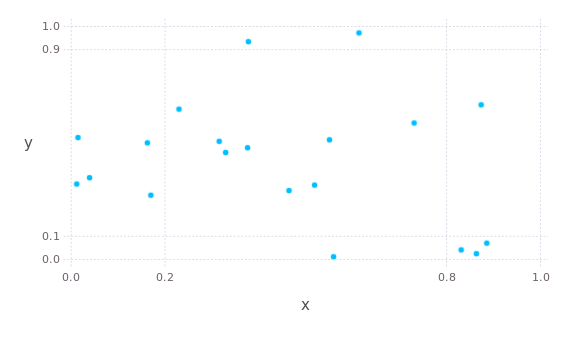

In [36]:
# Providing a fixed set of ticks
plot(x=rand(20), y=rand(20),
     Stat.xticks(ticks=[0.0, 0.2, 0.8, 1.0]),
     Stat.yticks(ticks=[0.0, 0.1, 0.9, 1.0]),
     Geom.point)

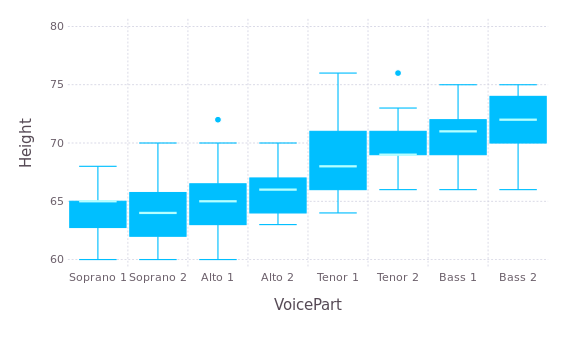

In [37]:
plot(dataset("lattice", "singer"),
    x="VoicePart", y="Height", Geom.boxplot)

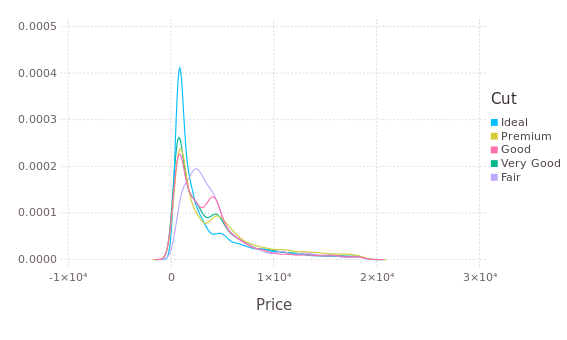

In [38]:
plot(dataset("ggplot2", "diamonds"),
    x="Price", color="Cut", Geom.density)

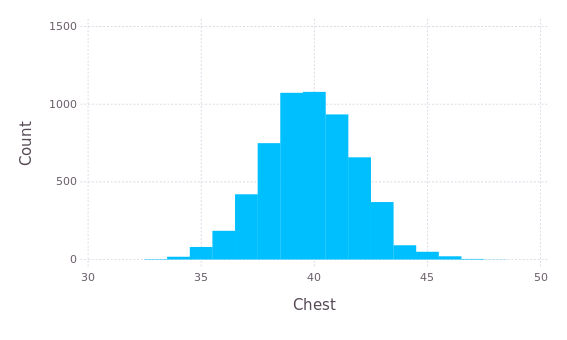

In [39]:
plot(dataset("HistData", "ChestSizes"),
    x="Chest", y="Count", Geom.bar)

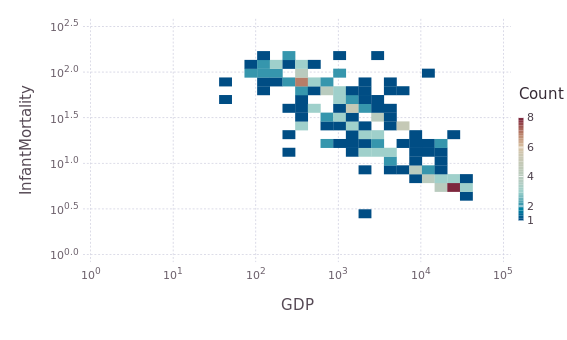

In [40]:
# Explicitly setting the number of bins
plot(dataset("car", "UN"), x="GDP", y="InfantMortality",
     Scale.x_log10, Scale.y_log10,
     Geom.histogram2d(xbincount=20, ybincount=20))

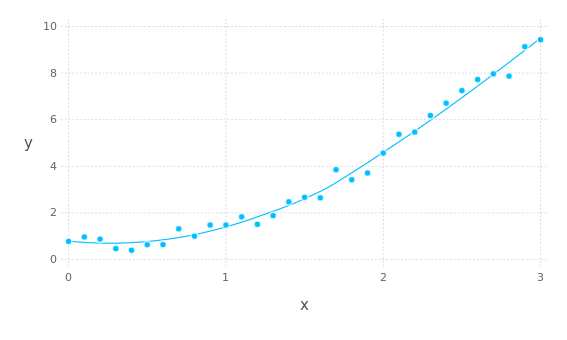

In [41]:
x_data = 0.0:0.1:3.0
y_data = x_data.^2 + rand(length(x_data))
plot(x=x_data, y=y_data,
    Geom.point,
    Geom.smooth(method=:loess,smoothing=0.9))

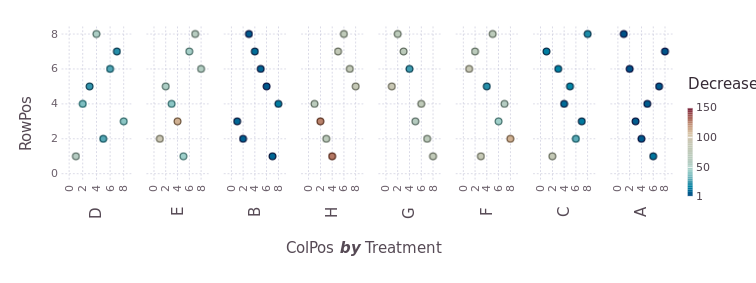

In [42]:
set_default_plot_size(20cm, 7.5cm)
plot(dataset("datasets", "OrchardSprays"),
     xgroup="Treatment", x="ColPos", y="RowPos", color="Decrease",
     Geom.subplot_grid(Geom.point))

In [43]:
using DataFrames

In [45]:
set_default_plot_size(8cm, 12cm)

In [73]:
# widedf = DataFrame(x = [1:10], var1 = [1:10], var2 = [1:10].^2)
# element-wise product [1:10].^2 does not work
var2 =[]
for i=1:10
    push!(var2, i*i)
end
typeof(Int.(var2))
widedf = DataFrame(x = [1:10], var1 = x, var2)

LoadError: [91mMethodError: no method matching DataFrames.DataFrame(::Array{Any,1}; x=UnitRange{Int64}[1:10], var1=UnitRange{Int64}[1:10])[0m
Closest candidates are:
  DataFrames.DataFrame(::Array{T,1} where T) at /root/.julia/v0.6/DataFrames/src/dataframe/dataframe.jl:107[91m got unsupported keyword arguments "x", "var1"[39m
  DataFrames.DataFrame(::Array{T,1} where T, [91m::DataFrames.Index[39m) at /root/.julia/v0.6/DataFrames/src/dataframe/dataframe.jl:77[91m got unsupported keyword arguments "x", "var1"[39m
  DataFrames.DataFrame(::Array{T,1} where T, [91m::Array{T,1} where T[39m) at /root/.julia/v0.6/DataFrames/src/dataframe/dataframe.jl:107[91m got unsupported keyword arguments "x", "var1"[39m
  ...[39m

In [51]:
longdf = stack(widedf, [:var1, :var2])

LoadError: [91mUndefVarError: widedf not defined[39m

In [ ]:
plot(longdf, ygroup="variable", x="x", y="value",
    Geom.subplot_grid(Geom.point, free_y_axis=true))

In [74]:
set_default_plot_size(15cm, 10cm)

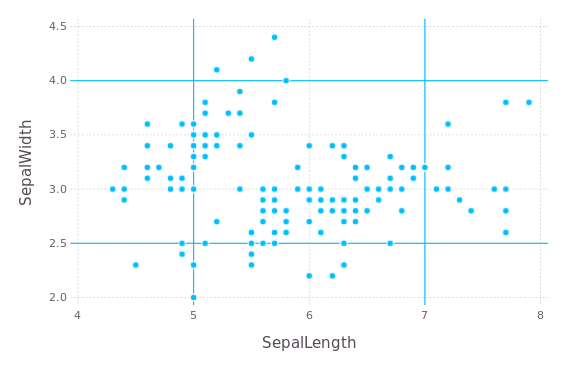

In [75]:
plot(dataset("datasets", "iris"), x="SepalLength", y="SepalWidth",
     yintercept=[2.5, 4.0], Geom.point, Geom.hline,
     xintercept=[5.0, 7.0], Geom.point, Geom.vline)

In [76]:
xs = 0:0.1:20

0.0:0.1:20.0

In [79]:
df_cos = DataFrame(
    x=xs,
    # WARNING: cos{T <: Number}(x::AbstractArray{T}) is deprecated, use cos.(x) instead.
    y=cos.(xs),
    ymin=cos.(xs) .- 0.5,
    ymax=cos.(xs) .+ 0.5,
    f="cos"
)

201×5 DataFrames.DataFrame
│ Row │ x    │ y        │ ymin        │ ymax     │ f     │
├─────┼──────┼──────────┼─────────────┼──────────┼───────┤
│ 1   │ 0.0  │ 1.0      │ 0.5         │ 1.5      │ "cos" │
│ 2   │ 0.1  │ 0.995004 │ 0.495004    │ 1.495    │ "cos" │
│ 3   │ 0.2  │ 0.980067 │ 0.480067    │ 1.48007  │ "cos" │
│ 4   │ 0.3  │ 0.955336 │ 0.455336    │ 1.45534  │ "cos" │
│ 5   │ 0.4  │ 0.921061 │ 0.421061    │ 1.42106  │ "cos" │
│ 6   │ 0.5  │ 0.877583 │ 0.377583    │ 1.37758  │ "cos" │
│ 7   │ 0.6  │ 0.825336 │ 0.325336    │ 1.32534  │ "cos" │
│ 8   │ 0.7  │ 0.764842 │ 0.264842    │ 1.26484  │ "cos" │
│ 9   │ 0.8  │ 0.696707 │ 0.196707    │ 1.19671  │ "cos" │
│ 10  │ 0.9  │ 0.62161  │ 0.12161     │ 1.12161  │ "cos" │
│ 11  │ 1.0  │ 0.540302 │ 0.0403023   │ 1.0403   │ "cos" │
⋮
│ 190 │ 18.9 │ 0.998728 │ 0.498728    │ 1.49873  │ "cos" │
│ 191 │ 19.0 │ 0.988705 │ 0.488705    │ 1.4887   │ "cos" │
│ 192 │ 19.1 │ 0.968802 │ 0.468802    │ 1.4688   │ "cos" │
│ 193 │ 19.2 │ 0.93922  │ 0.43922     │ 1.43922  │ "cos" │
│ 194 │ 19.3 │ 0.900254 │ 0.400254    │ 1.40025  │ "cos" │
│ 195 │ 19.4 │ 0.852292 │ 0.352292    │ 1.35229  │ "cos" │
│ 196 │ 19.5 │ 0.795815 │ 0.295815    │ 1.29581  │ "cos" │
│ 197 │ 19.6 │ 0.731386 │ 0.231386    │ 1.23139  │ "cos" │
│ 198 │ 19.7 │ 0.659649 │ 0.159649    │ 1.15965  │ "cos" │
│ 199 │ 19.8 │ 0.581322 │ 0.0813218   │ 1.08132  │ "cos" │
│ 200 │ 19.9 │ 0.497186 │ -0.00281421 │ 0.997186 │ "cos" │
│ 201 │ 20.0 │ 0.408082 │ -0.0919179  │ 0.908082 │ "cos" │

In [80]:
df_sin = DataFrame(
    x=xs,
    # WARNING: sin{T <: Number}(x::AbstractArray{T}) is deprecated, use sin.(x) instead.
    y=sin.(xs),
    ymin=sin.(xs) .- 0.5,
    ymax=sin.(xs) .+ 0.5,
    f="sin"
)

201×5 DataFrames.DataFrame
│ Row │ x    │ y         │ ymin       │ ymax     │ f     │
├─────┼──────┼───────────┼────────────┼──────────┼───────┤
│ 1   │ 0.0  │ 0.0       │ -0.5       │ 0.5      │ "sin" │
│ 2   │ 0.1  │ 0.0998334 │ -0.400167  │ 0.599833 │ "sin" │
│ 3   │ 0.2  │ 0.198669  │ -0.301331  │ 0.698669 │ "sin" │
│ 4   │ 0.3  │ 0.29552   │ -0.20448   │ 0.79552  │ "sin" │
│ 5   │ 0.4  │ 0.389418  │ -0.110582  │ 0.889418 │ "sin" │
│ 6   │ 0.5  │ 0.479426  │ -0.0205745 │ 0.979426 │ "sin" │
│ 7   │ 0.6  │ 0.564642  │ 0.0646425  │ 1.06464  │ "sin" │
│ 8   │ 0.7  │ 0.644218  │ 0.144218   │ 1.14422  │ "sin" │
│ 9   │ 0.8  │ 0.717356  │ 0.217356   │ 1.21736  │ "sin" │
│ 10  │ 0.9  │ 0.783327  │ 0.283327   │ 1.28333  │ "sin" │
│ 11  │ 1.0  │ 0.841471  │ 0.341471   │ 1.34147  │ "sin" │
⋮
│ 190 │ 18.9 │ 0.0504227 │ -0.449577  │ 0.550423 │ "sin" │
│ 191 │ 19.0 │ 0.149877  │ -0.350123  │ 0.649877 │ "sin" │
│ 192 │ 19.1 │ 0.247834  │ -0.252166  │ 0.747834 │ "sin" │
│ 193 │ 19.2 │ 0.343315  │ -0.156685  │ 0.843315 │ "sin" │
│ 194 │ 19.3 │ 0.435365  │ -0.0646346 │ 0.935365 │ "sin" │
│ 195 │ 19.4 │ 0.523066  │ 0.0230658  │ 1.02307  │ "sin" │
│ 196 │ 19.5 │ 0.60554   │ 0.10554    │ 1.10554  │ "sin" │
│ 197 │ 19.6 │ 0.681964  │ 0.181964   │ 1.18196  │ "sin" │
│ 198 │ 19.7 │ 0.751573  │ 0.251573   │ 1.25157  │ "sin" │
│ 199 │ 19.8 │ 0.813674  │ 0.313674   │ 1.31367  │ "sin" │
│ 200 │ 19.9 │ 0.867644  │ 0.367644   │ 1.36764  │ "sin" │
│ 201 │ 20.0 │ 0.912945  │ 0.412945   │ 1.41295  │ "sin" │

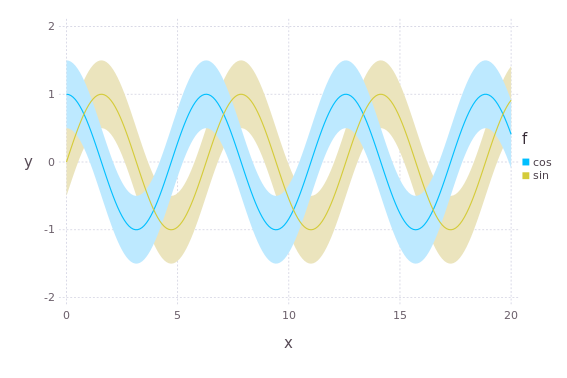

In [81]:
df = vcat(df_cos, df_sin)
p = plot(df, x=:x, y=:y, ymin=:ymin, ymax=:ymax, color=:f, Geom.line, Geom.ribbon)

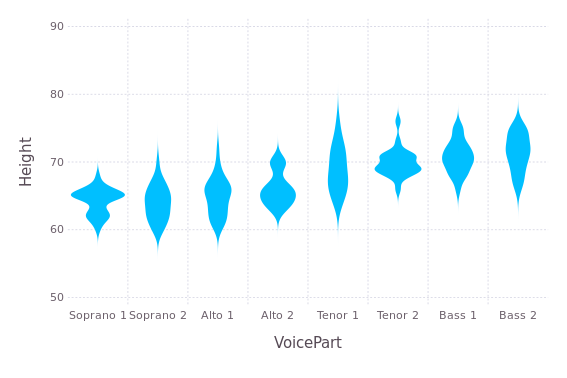

In [82]:
plot(dataset("lattice", "singer"),
    x="VoicePart", y="Height", Geom.violin)

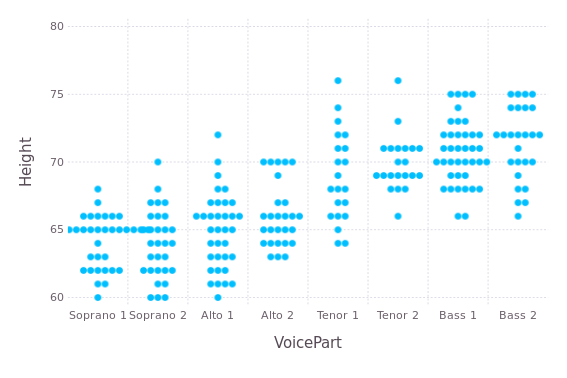

In [83]:
# Binding categorial data to x
plot(dataset("lattice", "singer"),
    x="VoicePart", y="Height", Geom.beeswarm)

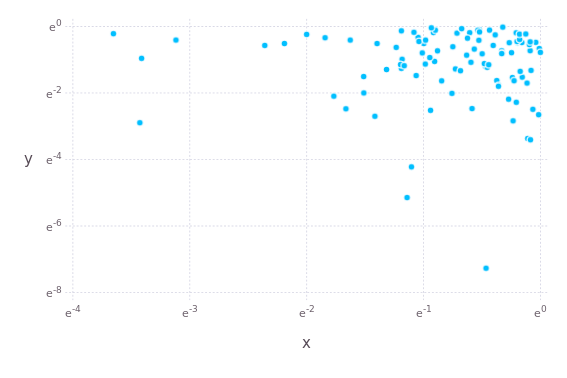

In [84]:
# Transform both dimensions
plot(x=rand(100), y=rand(100),
    Scale.x_log, Scale.y_log)

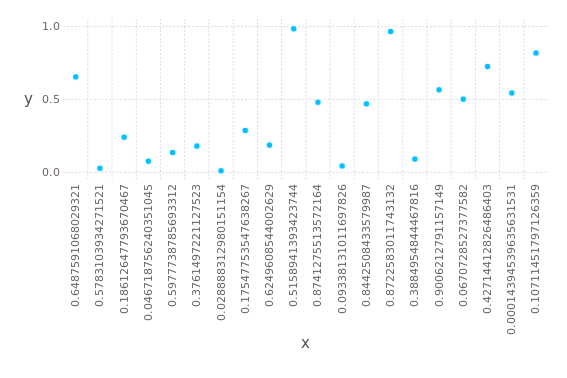

In [85]:
# Treat numerical y data as categories
plot(x=rand(20), y=rand(20),
    Scale.x_discrete)

In [86]:
using Colors

In [89]:
x = repeat([1:10], inner=[10])
y = repeat([1:10], outer=[10])
plot(x=x,y=y,color=x+y, Geom.rectbin,
     Scale.ContinuousColorScale(Scale.lab_gradient(colorant"green",
                                                   colorant"white",
                                                   colorant"red")))

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] isna(::UnitRange{Int64}) at ./deprecated.jl:57
 [3] isconcrete(::UnitRange{Int64}) at /root/.julia/v0.6/Gadfly/src/misc.jl:4
 [4] apply_scale(::Gadfly.Scale.ContinuousScale, ::Array{Gadfly.Aesthetics,1}, ::Gadfly.Data, ::Vararg{Gadfly.Data,N} where N) at /root/.julia/v0.6/Gadfly/src/scale.jl:195
 [5] apply_scales(::IterTools.Distinct{Base.ValueIterator{Dict{Symbol,Gadfly.ScaleElement}},Gadfly.ScaleElement}, ::Array{Gadfly.Aesthetics,1}, ::Gadfly.Data, ::Vararg{Gadfly.Data,N} where N) at /root/.julia/v0.6/Gadfly/src/scale.jl:33
 [6] apply_scales(::IterTools.Distinct{Base.ValueIterator{Dict{Symbol,Gadfly.ScaleElement}},Gadfly.ScaleElement}, ::Gadfly.Data) at /root/.julia/v0.6/Gadfly/src/scale.jl:52
 [7] render_prepare(::Gadfly.Plot) at /root/.julia/v0.6/Gadfly/src/Gadfly.jl:670
 [8] render(::Gadfly.Plot) at /root/.julia/v0.6/Gadfly/src/Gadfly.jl:748
 [9] show at /root/.julia/v0.6/Gadfly/src/Gadfly.jl:952 [inlined]
 [

TypeError: [91mTypeError: non-boolean (BitArray{1}) used in boolean context[39m

In [ ]:
plot(sin, 0, 2pi,
     Guide.annotation(
       compose(context(), circle([pi/2, 3*pi/2], [1.0, -1.0], [2mm]), fill(nothing),
       stroke(colorant"orange"))))